<a href="https://colab.research.google.com/github/DesiPilla/MLTSA_DPilla/blob/master/HW4/HW4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!pip install ruptures
import ruptures as rpt
import pylab as pl
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Synthetic data
the cell below creates a synthetic dataset _(x,y)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(0,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and 25 respectively.

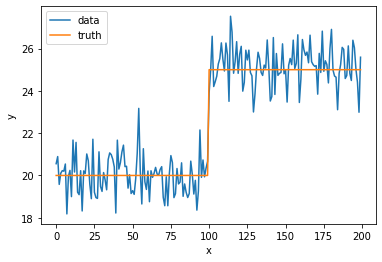

In [60]:
mu1, mu2 = 20, 25
x = np.arange(200)
ym = np.concatenate([np.random.randn(100) + mu1, np.random.randn(100) + mu2])
plt.plot(x, ym, label="data") 
plt.plot(range(200), [mu1] * 100 + [mu2] * 100, label="truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

**Figure 0:** This figure plots a piece-wise stationary dataset with $\mu = 20$ and $\mu = 25$ with a point of change at $x=100$. The variance is constant everywhere with $\sigma = 1$

# Single POC -  difference of means
write a function that finds the POC by assuming a single POC and maximizing the differencem in the means before and after the POC as described in
https://slides.com/federicabianco/mltsa4#/6/1
test it on the synthetic dataset _(x,y)_

In [61]:
def maxdiff(y):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N):
        diff_here = np.abs(f(y[i:]) -  f(y[:i]))
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(y[:i]), f(y[i:])
    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ym)))


poc: 100.00, mean before: 20.00, mean after: 25.20


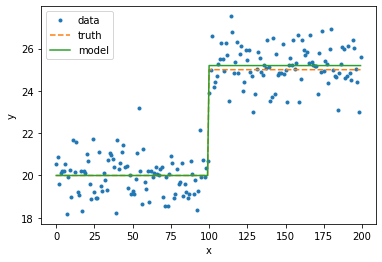

In [62]:
poc, before, after = maxdiff(ym)   
plt.plot(x, ym, '.', label="data")
plt.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
plt.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
plt.xlabel('x')
plt.ylabel('y');
plt.legend();

**Figure 1:** This plot shows all data points as well as the true nature of the data (orange line). At $x=100$, the mean increases from 20 to 25. The figure also plots the model (green line), which shows a flat line at 20.00 that increases to 25.20 at $x=100$. The model correctly located the point of change in this dataset and closely follows the truth.

# Single POC - MSE
write a function that finds the POC by minimizing the square error (see slide https://slides.com/federicabianco/mltsa4#/6/2) a single POC and maximizing the differencem in the means before and after the POC. like before return the index of the POC, the mean before and the mean after the POC.
Plot the data, the model, the truth, like in the step above.


Remember to write a docstring for the function https://www.python.org/dev/peps/pep-0257/!

In [0]:
def poc_mse(y):
    """calculates the POC as the points that minimize the MSE before and after the POC
    y: vector of endogenouos variables
    """
    N = len(y)
    f = np.nanmean
    poc, MSE, before, after = 0, np.inf, np.nan, np.nan
    for i in range(1, N):
        MSE_here = ((y[:i] - f(y[:i]))**2).sum() + ((y[i:] - f(y[i:]))**2).sum()
        if MSE_here < MSE:
            MSE = MSE_here
            poc = i
            before, after = f(y[:i]), f(y[i:])

    return poc, before, after

In [64]:
print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*poc_mse(ym)))

poc: 100.00, mean before: 20.00, mean after: 25.20


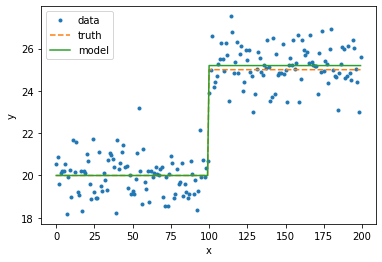

In [65]:
poc, before, after = poc_mse(ym)   
plt.plot(x, ym, '.', label="data")
plt.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
plt.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
plt.xlabel('x')
plt.ylabel('y');
plt.legend();

**Figure 2:** This plot shows all data points as well as the true nature of the data (orange line). At $x=100$, the mean increases from 20 to 25. The figure also plots the model (green line), which shows a flat line at 20.00 that increases to 25.20 at $x=100$. The model, correctly, located the same point of change as the previous model and closely follows the truth.

# Single POC - diff of variance
Generate a new synthetic dataset _(x,ys)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(\sigma,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and variance 1 and 4 respectively.

Modify the ```maxdiff()``` function so that it take an optional parameter sigma which allows you to use the function to choose the POC that maximizes the different in standard deviation, instead of in mean. An optional argument is an argument that is set to a default in the function call. The default behavior of the function shoudl still be to calculate the POC as the point that maximized the before and after difference in the _mean_.


In [0]:
mu1, mu2 = 20, 25
s2 = 4
ys = np.concatenate([np.random.randn(100)  + mu1 , np.random.randn(100) * s2 + mu1])

In [74]:
def maxdiff(y, sigma=False):
    """calculates the POC as the points that maximized the difference between 
                the mean or variance before and the mean after the POC
    y: vector of endogenouos variables 
    sigma: finds the POC that maximizes the difference between before/after POC variance 
                (optional, default is before/after mean)
    """
    N = len(y)
    if sigma:
        f = np.nanstd
    else:
        f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N):
        diff_here = np.abs(f(y[i:]) -  f(y[:i]))
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(y[:i]), f(y[i:])

    return(poc, before, after)  
 
print("poc: {:.2f}, std. dev. before: {:.2f}, std. dev. after: {:.2f}".format(*maxdiff(ys, 
                                                                    sigma=True)))

poc: 100.00, std. dev. before: 0.98, std. dev. after: 4.14


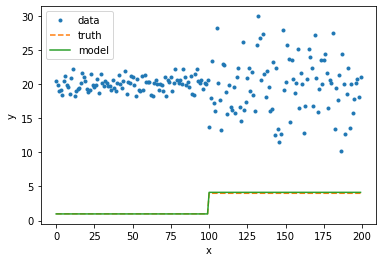

In [75]:
poc, before, after = maxdiff(ys, sigma=True)   
plt.plot(x, ys, '.', label="data")
plt.plot(range(200), [1] * 100 + [s2] * 100, '--', label="truth")
plt.plot(x, [before] * poc + [after] * (len(ys) - poc), label="model")
plt.xlabel('x')
plt.ylabel('y');
plt.legend();

**Figure 3:** This plot shows all data points as well as the true standard deviation of the data (orange line). At $x=100$, the standard deviation increases from 1 to 4. The figure also plots the model (green line), which shows a piece-wise stationary model with constant standard deviation of 0.98 that increases to 4.14 at $x=100$. The model correctly located the point of change in this dataset and closely follows the truth.

# Find POC with rupture python package.
install and import the rupture package.
Find the POC in each synthetic time series.
Use the Pelt method. Reflect on the parameters that should be passed to the predict() function. Read the manual and feel free to ask questions on slack.

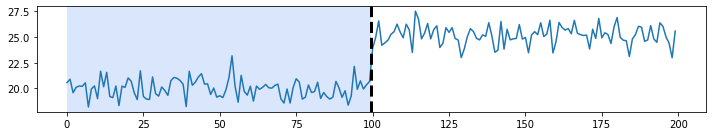

In [76]:
# detection
algo = rpt.Pelt(model="l1").fit(ym)
result = algo.predict(pen=3)

# display
rpt.display(ym, [100], result)
pl.show()

**Figure 4:** This figure plots the first piece-wise dataset and the rupture prediction. The rupture model correctly predicts one point of change at $x=100$.

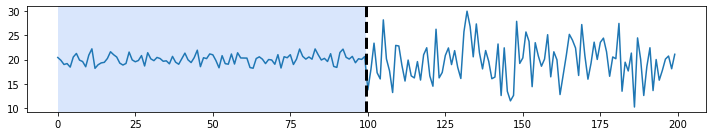

In [77]:
# detection
algo = rpt.Pelt(model="rbf").fit(ys)
result = algo.predict(pen=3)

# display
rpt.display(ys, [100], result)
pl.show()

**Figure 5:** This figure plots the second piece-wise dataset and the rupture prediction. The rupture model correctly predicts one point of change at $x=100$.

# read in the data from LANL earthquake prediction 
I saved in the github repo as "http://fbb.space/mltsa/LALNeq.csv. This is a large file and will take a long time to read in. It is 1/100th of the original file. See how nice I am!?! https://www.kaggle.com/c/LANL-Earthquake-Prediction/data

Visualize and use the method DataFrame.describe() to extract some basic statistics of the dataset

In [79]:
eq1 = pd.read_csv('http://fbb.space/mltsa/LALNeq.csv', usecols=[1,2])
eq1.describe()

,acoustic_data,time_to_failure
count,4.500000e+06,4.500000e+06
mean,4.616407e+00,8.852012e-01
std,2.614006e+01,3.374432e-01
min,-4.621000e+03,3.008971e-01
25%,2.000000e+00,5.934956e-01
50%,5.000000e+00,8.849986e-01
75%,7.000000e+00,1.177597e+00
max,3.252000e+03,1.469100e+00


In [80]:
eq1.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


# using rupture

Go through the documentation of rupture. 

Find a method that takes as input the number of pocs and has computational complexity O(kN^2) and run it for k=1,2,3 pocs on the first N=10,000, 5000, and 1000 rows of the datasets respectively (make a plot for each and discuss each in the caption)




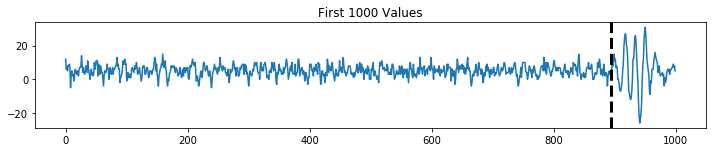

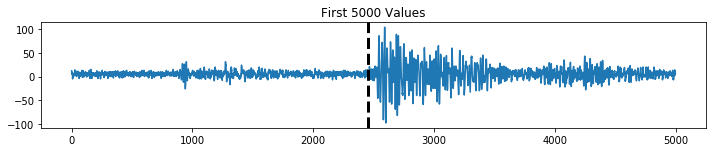

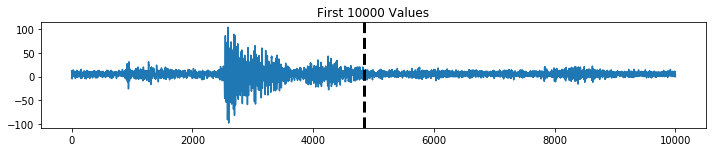

In [90]:
for i in [1000, 5000, 10000]:
    algo1 = rpt.Dynp(model='rbf').fit(eq1.acoustic_data.values[:i])
    result = algo1.predict(n_bkps=1)

    # display
    rpt.display(eq1.acoustic_data.values[:i], [], result)
    plt.title('First %d Values' % i)
    plt.show()

**Figure 6:** This figure shows the rupture predictions for 1 point of change on the LANL earthquake data. The first plot marks the point of change in the first 1,000 values. The second plot marks the point of change in the first 5,000 values. The third plot marks the point of change in the first 10,000 values. This model only appears accurate for the first 1,000 values, as it appears to distinguish a pulse from the rest of the signal. In the second plot, the model places the point of change before a big spike in the variance. The third plot places the point of change at the end of a pulse. For the last two plots, the model seems to only be telling part of the story. This likely means that there are more than 1 point of change in these segments.

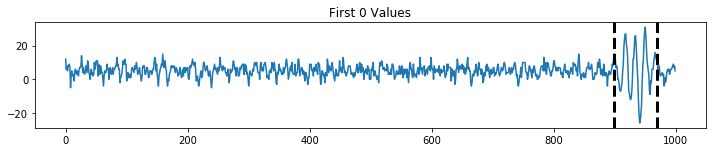

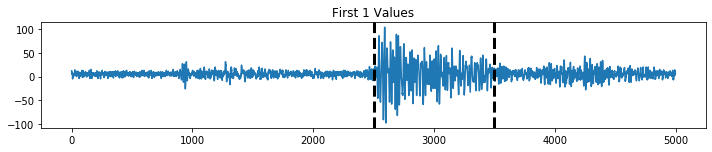

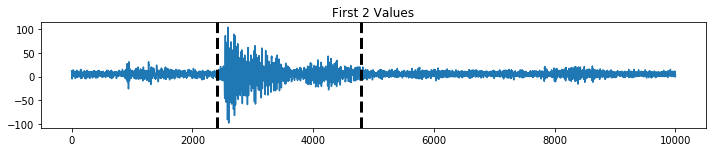

In [109]:
sizes = [1000, 5000, 10000]
jumps = [10, 100, 200]
for i in range(3):
    algo2 = rpt.Dynp(model='rbf', jump=jumps[i]).fit(eq1.acoustic_data.values[:sizes[i]])
    result = algo2.predict(n_bkps=2)

    # display
    rpt.display(eq1.acoustic_data.values[:sizes[i]], [], result)
    plt.title('First %d Values' % i)
    plt.show()

**Figure 7:** This figure shows the rupture predictions for 1 point of change on the LANL earthquake data. The first plot marks the two points of change in the first 1,000 values. The second plot marks the two points of change in the first 5,000 values. The third plot marks the two points of change in the first 10,000 values. In the first plot, the model appears to distinguish a pulse from the rest of the signal. In the second plot, the model places the point of change before and after a big spike in the variance. The third plot places the point of change before a big spike in the variance and after a pulse later on. For the two plots, the model seems to only be telling part of the story. This likely means that there are more than 2 point of change in these segments.

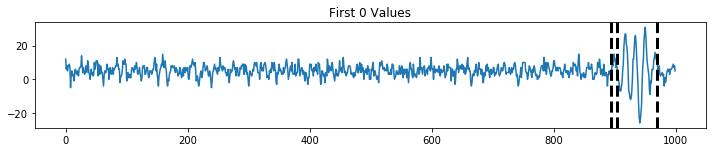

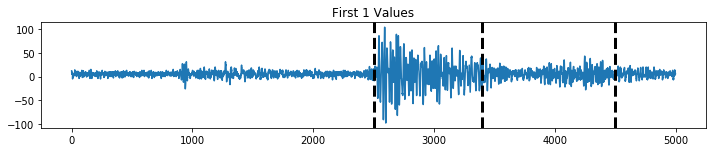

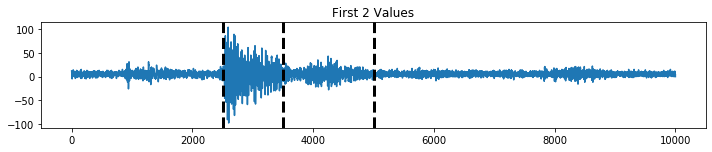

In [113]:
sizes = [1000, 5000, 10000]
jumps = [5, 100, 500]
for i in range(3):
    algo3 = rpt.Dynp(model='rbf', jump=jumps[i]).fit(eq1.acoustic_data.values[:sizes[i]])
    result = algo3.predict(n_bkps=3)

    # display
    rpt.display(eq1.acoustic_data.values[:sizes[i]], [], result)
    plt.title('First %d Values' % i)
    plt.show()

**Figure 8:** This figure shows the rupture predictions for 3 points of change on the LANL earthquake data. The first plot marks the three points of change in the first 1,000 values. The second plot marks the three points of change in the first 5,000 values. The third plot marks the three points of change in the first 10,000 values. In the first plot, the model appears to distinguish a pulse from the rest of the signal, yet it also has two POCs very close together. This segment between the two close POCs does not appear to be a separate segment. This likely means that there are less than 3 POCs in this segment. In the second plot, the model places the point of change before and after a big spike in the variance, as well as further in the signal. It does not appear to me that the last two POCs are appropriately placed, which would also imply that ther are less than 3 POCs in this segment. The third plot places the point of change before and after a big spike in the variance and after a pulse later on. This seems like an appropriate number of POCs.

Find a method that has computational complexity O(Nlog(N))

Run both methods on the full 10000 rows dataset with the goal is to isolate 3 chunks of the time series. Read about the methods you choose, and describe the constraints you imposed and the paraemters you choose.

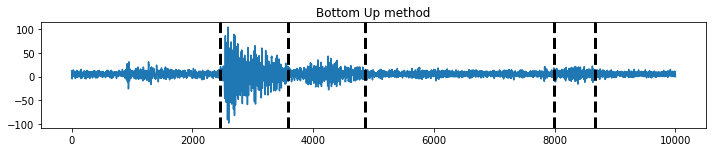

In [149]:
algo = rpt.detection.BottomUp(model='rbf').fit(eq1.acoustic_data.values[:10000])
result = algo.predict(n_bkps=5)

#display
rpt.display(eq1.acoustic_data.values[:10000], [], result)
plt.title('Bottom Up method')
plt.show()

**Figure 9:** This figure shows the rupture predictions for 3 points of change on the LANL earthquake data. The first segment the model isolates is a pulse that with a large and decreasing variance. The second segment the model isolates is a smaller pulse directly following the first one. The final segment the model isolates is an even smaller pulse near the end of the signal.

This model used the `rbf` parameter as its cost funtion. This led to more appropriate results, as the first segment has a changing variance. The number of POCs was also identified to be 5: a begining and end POC for each isolated segment, minus 1 because two of them are back to back. 